In [30]:
!pip install seaborn
!pip install matplotlib 
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install tensorflow
!pip install keras
!pip install streamlit


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\mayan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import streamlit as st
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier


LOAD DATASET

In [9]:
iris = pd.read_csv('./IRIS.csv')

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
Species = iris['species'].value_counts().reset_index()
Species

,species,count
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


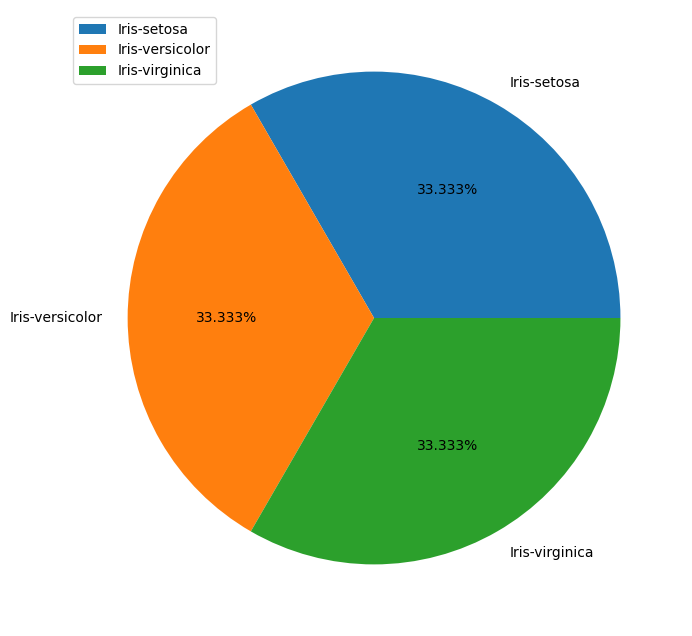

In [12]:
plt.figure(figsize=(8,8))
plt.pie(Species['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

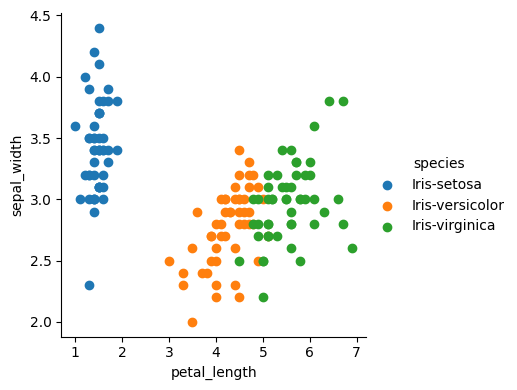

In [13]:
#Scatter plot of different species
sns.FacetGrid(iris, hue ='species', height = 4).map(plt.scatter,"petal_length","sepal_width").add_legend()
plt.show()

CHECKING MISSING VALUES

In [14]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [15]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Target Variable Splitting

In [17]:
# Split data to be used in the models
# Create matrix of features
x = iris.drop('species', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = iris['species'] # y is the column we're trying to predict

In [19]:
scaler = StandardScaler().fit(x)
x_transform = scaler.transform(x)

Label encoder

In [21]:
# import labelencoder from sklearn
from sklearn.preprocessing import LabelEncoder

In [22]:
# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [23]:
# One-hot encode the target labels
y_onehot = tf.keras.utils.to_categorical(y_encoded)

In [24]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_transform, y_onehot, test_size=0.10, random_state=101)

In [25]:
# Define the input size for each data sample
input_size = x_train.shape[1]

In [26]:
iris.shape

(150, 5)

In [35]:
# Define the input size for each data sample (e.g., image pixels)
input_size = 4

# Specify the number of data samples to process in each batch
batch_size = 10

# Define the number of neurons in the first hidden layer
hidden1 = 100

# Define the number of neurons in the second hidden layer
hidden2 = 50


# Define the total number of classes/categories in the dataset
classes = 3

# Set the number of complete passes through the dataset during training
epochs = 70

In [36]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))


# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

C:\Users\mayan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,703 (22.28 KB)

 Trainable params: 5,703 (22.28 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4419 - loss: 1.0428
Epoch 2/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7935 - loss: 0.7239 
Epoch 3/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8171 - loss: 0.5147
Epoch 4/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8191 - loss: 0.4267
Epoch 5/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8315 - loss: 0.3829
Epoch 6/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7990 - loss: 0.4027 
Epoch 7/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8287 - loss: 0.3283 
Epoch 8/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8684 - loss: 0.3367
Epoch 9/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8636 - loss: 0.2726
Epoch 10/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9539 - loss: 0.2331
Epoch 11/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9525 - loss: 0.2175  
Epoch 12/70
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9

In [38]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Accuracy: {accuracy:.4f}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 1.0000 - loss: 0.0674
Test Accuracy: 1.0000
